In [1]:
#路径管理/全局变量
import os
import sys

# 设置为项目根目录（包含 data, pipline 等文件夹的目录）
project_root = os.path.abspath("..")
os.chdir(project_root)
sys.path.append(project_root)
from utils.config import KEYWORDS
from utils.path_helper import get_data_path

#基础模块
import numpy as np
import pandas as pd

#清洗函数，特征工程函数导入
from pipline.pipline import pipeline_house_data
from features_wlh.features_wlh import add_selected_features

#导入训练函数
from model.train_model import train_model
#选择训练函数，自己去调整
from sklearn.ensemble import RandomForestRegressor
#训练集划分(已经在train_model里面做过,导入只是告诉你已经做完了)
from sklearn.model_selection import train_test_split
#特征值相关性检验,共线性检验
from features_wlh.feature_analysis import plot_feature_correlation
from features_wlh.feature_vif_validation import check_multicollinearity
#评估
from model.evaluate import evaluate_model

In [2]:
# 读取数据
df_cleaned = pd.read_csv(get_data_path("processed_data/house_prices_cleaned.csv"))
# 清洗数据
#df_cleaned = pipeline_house_data(df, keywords=KEYWORDS)

C:\Users\K.Hawk\AppData\Local\Temp\ipykernel_28100\365901928.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv(get_data_path("processed_data/house_prices_cleaned.csv"))


In [3]:
df_cleaned.head()

,Index,Price (in rupees),Carpet Area,Status,Transaction,Furnishing,Balcony,is_prime_location,has_proximity,is_well_planned,...,is_ground,is_basement,relative_height,col_facing_score,col_overlooking_score,society_level,col_Bathroom_score,col_car_parking_score,ownership_score,Amount_clean
0,0,6000.0,500.0,Ready to Move,Resale,Unfurnished,2,0,0,0,...,0,0,0.909091,-1,-1,0,1.0,0,1,4200000.0
1,1,13799.0,473.0,Ready to Move,Resale,Semi-Furnished,NaN,0,1,0,...,0,0,0.136364,4,1,0,2.0,1,3,9800000.0
2,2,17500.0,779.0,Ready to Move,Resale,Unfurnished,NaN,1,1,0,...,0,0,0.344828,4,1,0,2.0,2,3,14000000.0
3,3,NaN,530.0,Ready to Move,Resale,Unfurnished,1,0,0,0,...,0,0,0.333333,-1,-1,0,1.0,0,3,2500000.0
4,4,18824.0,635.0,Ready to Move,Resale,Unfurnished,NaN,0,0,0,...,0,0,0.476190,1,0,0,2.0,2,1,16000000.0


In [4]:
print(df_cleaned.shape)


(177847, 33)


Fundenmental Analysis

Analysis with picture and Visualization

Project  of Features and Validation

In [5]:
My_features = ["std_price",
    "Car_Parking",
    "Bathroom",
    "Furnishing_giving",
    "Transaction_giving",
    "balcony_rank",
    "facing_giving",
    "has_amenities",
    "has_green_space",
    "has_proximity",
    "is_affordable",
    "is_basement",
    "is_deal",
    "is_gated",
    "is_ground",
    "is_luxury",
    "is_marketing_strong",
    "is_new",
    "is_prime_location",
    "is_resale",
    "is_spacious",
    "is_well_planned",
    "location_rank",
    "max_floor",
    "ownership_score",
    "relative_height",
    "society_level_hot",
    "Status_giving"] #一个示例，训练的时候根据特征分析自己去选

df_cleaned_features = add_selected_features(df_cleaned, features_to_use = My_features)

In [7]:
print(df_cleaned_features.columns.tolist())

['Index', 'Price (in rupees)', 'Carpet Area', 'Status', 'Transaction', 'Furnishing', 'Balcony', 'is_prime_location', 'has_proximity', 'is_well_planned', 'is_new', 'is_resale', 'is_affordable', 'is_deal', 'is_spacious', 'is_luxury', 'is_gated', 'has_amenities', 'has_green_space', 'is_marketing_strong', 'location_encoded', 'floor_level', 'max_floor', 'is_ground', 'is_basement', 'relative_height', 'col_facing_score', 'col_overlooking_score', 'society_level', 'col_Bathroom_score', 'col_car_parking_score', 'ownership_score', 'Amount_clean', 'std_price', 'Car_Parking', 'Bathroom', 'Furnishing_giving', 'Transaction_giving', 'balcony_rank', 'facing_giving', 'location_rank', 'location_level', 'society_level_hot', 'Status_giving']


In [8]:
df_cleaned_features.isnull().sum()


Index                        0
Price (in rupees)            0
Carpet Area                  0
Status                       0
Transaction                  0
Furnishing                   0
Balcony                  47159
is_prime_location            0
has_proximity                0
is_well_planned              0
is_new                       0
is_resale                    0
is_affordable                0
is_deal                      0
is_spacious                  0
is_luxury                    0
is_gated                     0
has_amenities                0
has_green_space              0
is_marketing_strong          0
location_encoded             0
floor_level                  0
max_floor                    0
is_ground                    0
is_basement                  0
relative_height              0
col_facing_score             0
col_overlooking_score        0
society_level                0
col_Bathroom_score           0
col_car_parking_score        0
ownership_score              0
Amount_c

c:\Users\K.Hawk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


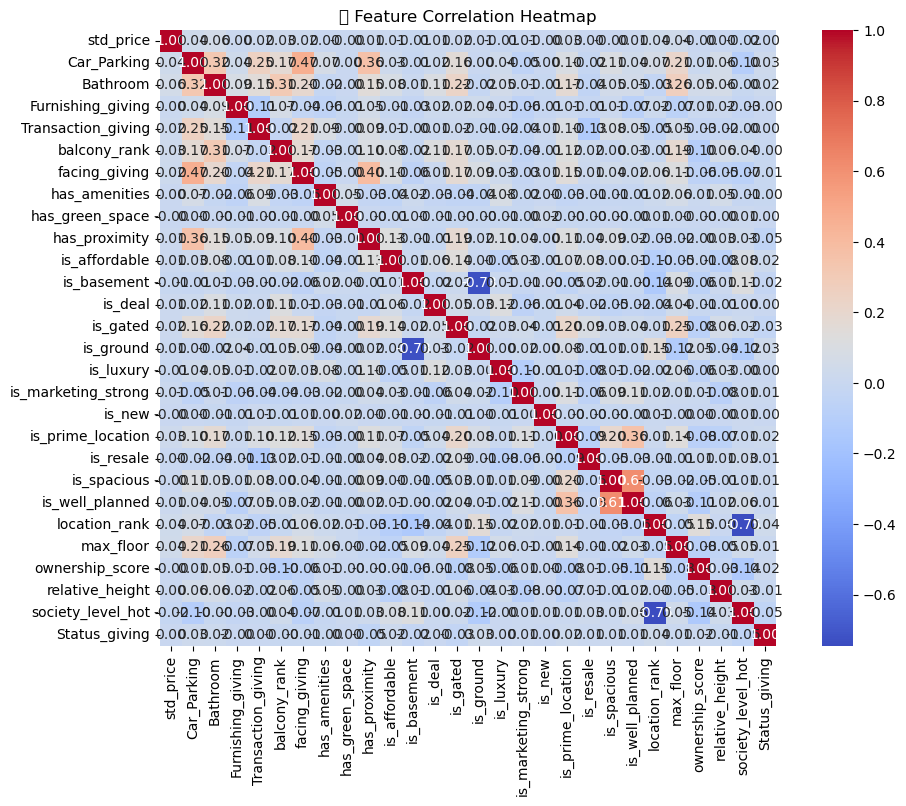

⚠️ 高度相关的特征对（|相关性| > 0.5)：
is_ground & is_basement → 相关系数: -0.728
is_well_planned & is_spacious → 相关系数: 0.614
society_level_hot & location_rank → 相关系数: -0.746
🧪 方差膨胀因子（VIF）检测结果：
  feature         VIF
0   const  390.424781


In [11]:
plot_feature_correlation(df_cleaned_features, features = My_features, threshold=0.5)
vif_result = check_multicollinearity(df_cleaned_features, features=My_features,threshold=5)

Train Model (去train_model.py里面调整参数,调整模型选择，notebook仅用于使用grid找参数)

In [14]:
after_trained_model, X_test, y_test = train_model(df_cleaned_features, df_cleaned, features_to_use = My_features) 

✅ 模型训练完成，保存到： models_saved/rf_model.pkl


Evaulate Model & Parameter optimization

In [15]:
evaluate_model(after_trained_model, X_test, y_test)



MAE: 1248017.91
RMSE: 62983162.08
R² Score: 0.3207


{'MAE': 1248017.9089991772,
 'RMSE': 62983162.084624656,
 'R2': 0.3206618341997879}